In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player <- read_csv("project_data/players.csv")
session <- read_csv("project_data/sessions.csv")
player
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## (1) Data Description

#### Number of Observations
`player` 196

`session` 1535


#### Statistics Summary (Mean)
`player`
- `played_hours` 5.90
- `age` 21.14

`session`
- `original_start_time` 1.72e+12
- `original_end_time` 1.72e+12


#### Number of Variables
`player` 7

`session` 5


#### Type of Variables

- `experience` character
- `subscribe` logical
- `hashedEmail` character
- `player_hours` double
- `name` character
- `gender` character
- `Age` double
- `start_time` character
- `end_time` character
- `original_start_time` double
- `original_end_time` double


#### Meaning of Variables

- `experience` level of gaming experience: amateur, beginner, regular, pro, veteran
- `subscribe` if they are subscribed to the game-related newsletter
- `hashedEmail` player's email in hashed (unique) code
- `player_hours` number of hours played
- `name` first name of player
- `gender` gender of player
- `Age` age of player
- `start_time` start time of session in standard form (day/month/year, time)
- `end_time` end time of session in standard form (day/month/year, time)
- `original_start_time` start time of session in numeric form
- `original_end_time` end time of session in numeric form


#### Issues in Data

- inconsistent naming convention (ie. hashedEmail -> hashed_email)
- incorrect type of variables (ie. experience -> category)
- unclear meaning of variables (ie. start_time -> original_start_time)
- missing data (row 196 -> age)


#### Collection Method
primary data collection: observational research via MineCraft server

## (2) Question

#### Question
Can `experience` predict `played_hours` in the `player` dataset?


#### Addressing the Question
I will perform K-NN Classification using `experience` as the predictor variable and `played_hours` as the response variable then measure performance (accuracy, precision, recall) to answer the question above.


#### Wrangling the Data
I will first address the issues in the data set by renaming variables and filtering out missing observations. Then, I will use the `as.factor` function to make the `experience` variable categorical.

## (3) Exploratory Data Analysis and Visualization

#### Demonstrate that the data set can be loaded into R

In [10]:
player <- read_csv("project_data/players.csv")
session <- read_csv("project_data/sessions.csv")

player
session

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Wrangling the Data

In [11]:
# renaming variables for consistency
player <- player |>
    rename(hashed_email = hashedEmail, age = Age)
session <- session |>
    rename(hashed_email = hashedEmail)

# filtering out missing observations for k-nn classification
player <- drop_na(player)
session <- drop_na(session)

# changing `experience` into a categorical variable
player <- player |>
    mutate(experience = as.factor(experience))

player
session

experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Mean Values

In [12]:
player_means <- player |>
    summarize(played_hours_mean = mean(played_hours),
              age_mean = mean(age))
player_means

session_means <- session |>
    summarize(original_start_mean = mean(original_start_time),
              original_end_mean = mean(original_end_time))
session_means

played_hours_mean,age_mean
<dbl>,<dbl>
5.904639,21.13918


original_start_mean,original_end_mean
<dbl>,<dbl>
1.719193e+12,1.719196e+12


#### Exploratory Visualizations

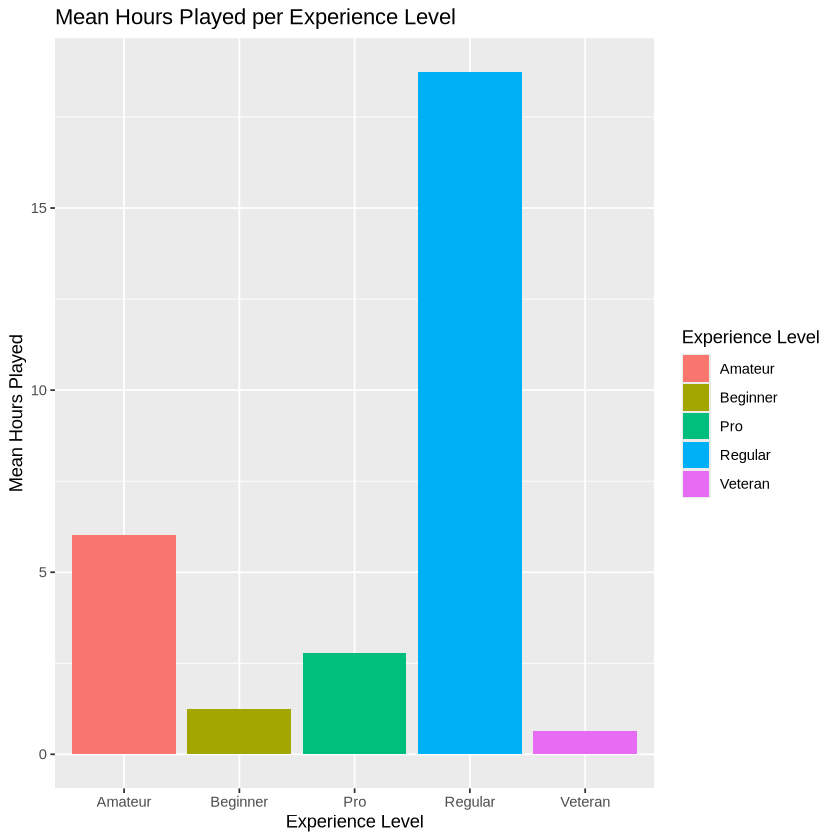

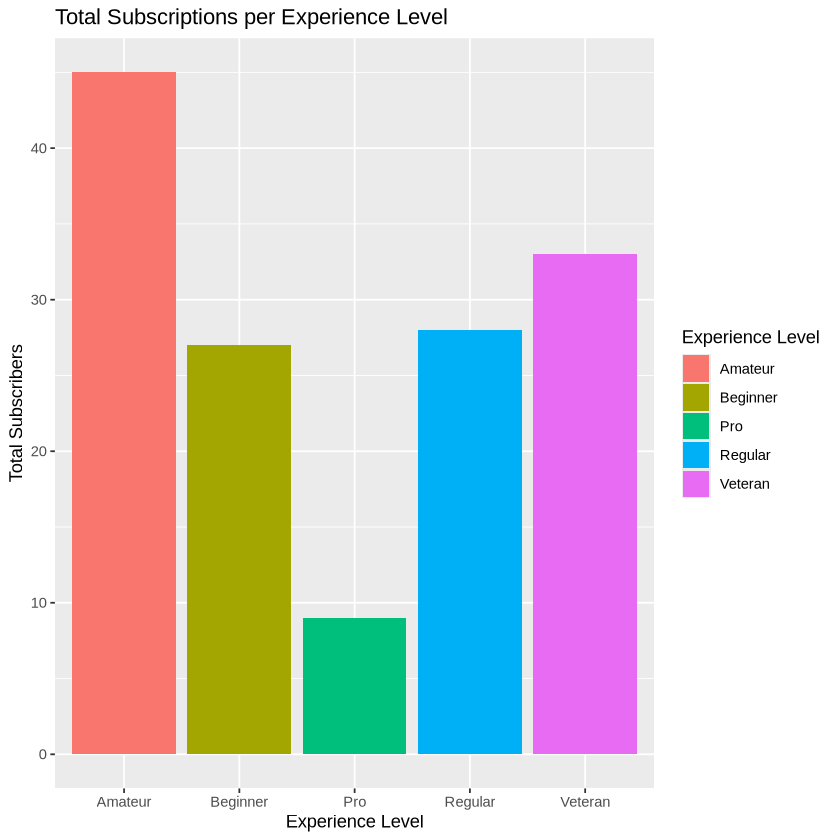

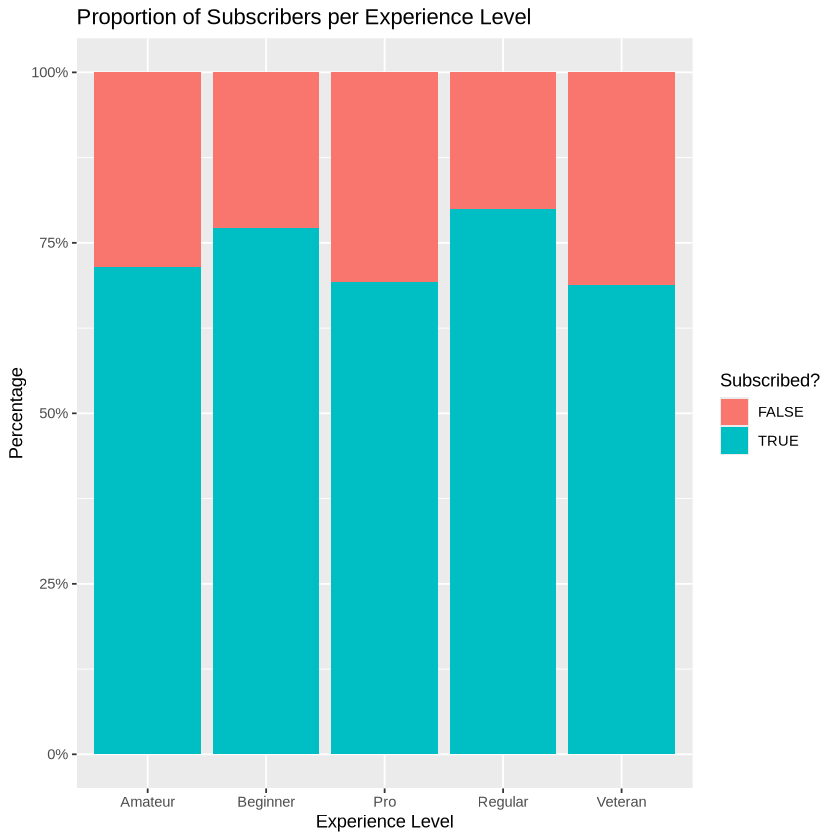

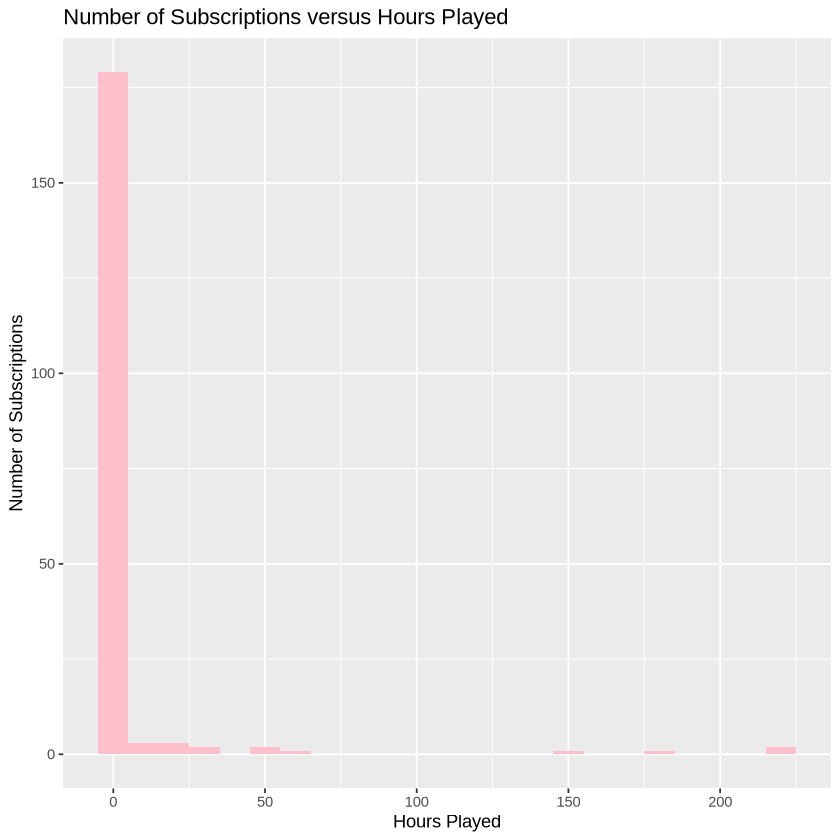

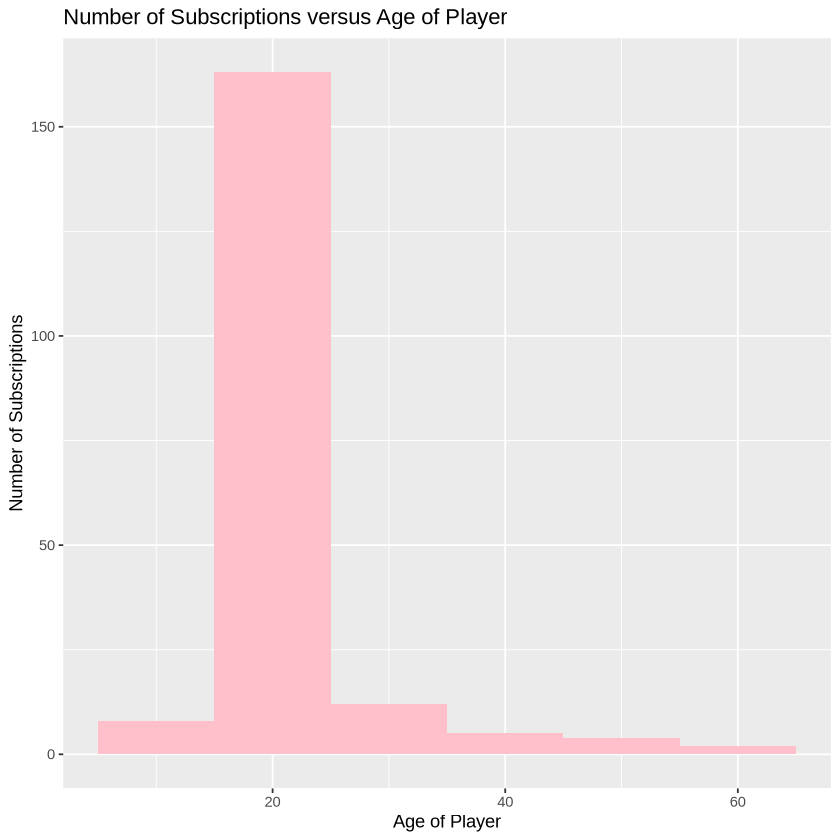

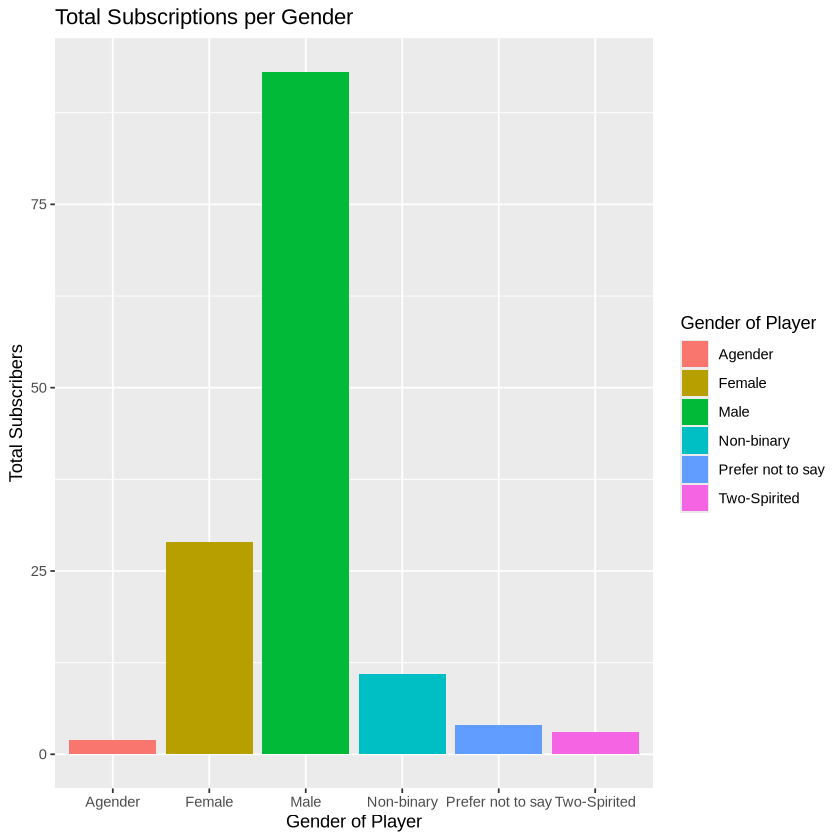

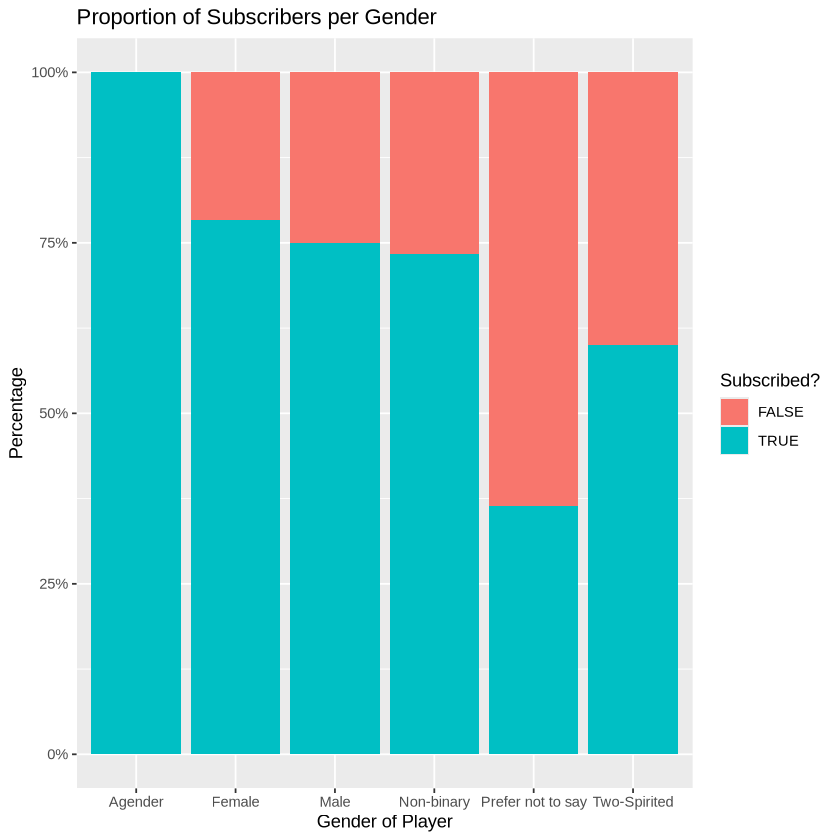

In [14]:
# answering my question (part 2)

# regular players have play the most hours on average while veterans play the least
player_plot_my_question <- player |>
    group_by(experience) |>
    summarize(experience_mean_hours = mean(played_hours)) |>
    ggplot(aes(x = experience, y = experience_mean_hours, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience Level", y = "Mean Hours Played", fill = "Experience Level", title = "Mean Hours Played per Experience Level")
player_plot_my_question

#answering project question (question 1)

# amateurs subscribe the most, followed by veterans
# regulars have the third most subscribers despite playing the most hours
player_plot_experience <- player |>
    group_by(experience) |>
    summarize(total_subscriptions = sum(subscribe)) |>
    ggplot(aes(x = experience, y = total_subscriptions, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience Level", y = "Total Subscribers", fill = "Experience Level", title = "Total Subscriptions per Experience Level")
player_plot_experience

# however, this visualization shows that regular players have the most subscribers proportionately and veterans have the least
player_plot_experience_percent <- player |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") + 
    scale_y_continuous(labels = scales::percent_format()) + 
    labs(x = "Experience Level", y = "Percentage", fill = "Subscribed?", title = "Proportion of Subscribers per Experience Level")
player_plot_experience_percent

# the group who play the least number of hours have significantly more subscribers
# all other groups are about the same
player_plot_hours <- player |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10, fill = "pink") +
    labs(x = "Hours Played", y = "Number of Subscriptions", title = "Number of Subscriptions versus Hours Played")
player_plot_hours

# players in their teens and early twenties have significantly more subscribers
player_plot_age <- player |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 10, fill = "pink") +
    labs(x = "Age of Player", y = "Number of Subscriptions", title = "Number of Subscriptions versus Age of Player")
player_plot_age

# males are the biggest group of subscribers, followed by female and non-binary people
player_plot_gender <- player |>
    group_by(gender) |>
    summarize(total_subscriptions = sum(subscribe)) |>
    ggplot(aes(x = gender, y = total_subscriptions, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(x = "Gender of Player", y = "Total Subscribers", fill = "Gender of Player", title = "Total Subscriptions per Gender")
player_plot_gender

# however, this visualization shows that agender have the most subscribers proportionately, followed by females and males
player_plot_gender_percent <- player |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") + 
    scale_y_continuous(labels = scales::percent_format()) + 
    labs(x = "Gender of Player", y = "Percentage", fill = "Subscribed?", title = "Proportion of Subscribers per Gender")
player_plot_gender_percent

## (4) Methods and Plan

**Why is this method appropriate?**

K-NN Classification is appropriate because we are dealing with a categorical variable, `experience`, and `played_hours` is a numerical variable. The data set is also large enough that we can split to perform both training and testing.

**Which assumptions are required, if any, to apply the method selected?**

We must assume or question that there is a relationship between `experience` and `played_hours`. As mentioned above, the response variable must be categorial and the predictor variable must be numeric (or categorical). We must assume that observations that have similar variables (features) belong to the same category (class) and all variables (features) are independent from each other.

**What are the potential limitations or weaknesses of the method selected?**

K-NN Classification is quite slow for larger data sets and can be sensitive to noise and outliers. Choosing a good 'K' value is also important to avoid overfitting or underfitting. Finally, it only performs well using numerical predictor variables.

**How are you going to compare and select the model?**

I can determine the performance of my K-NN Classification by testing the data set and using accuracy, precision, recall via a confusion matrix.

**How are you going to process the data to apply the model?**

I will firstly split the data into a training and testing set. Then, I will use a 75% proportion and use the `vfold_cv` function to split the training set for cross-validation. After creating a model specification, recipe, and fitting the data, I will use the `tune_grid` function to estimate the classifier accuracy. After picking the best 'K' value, I will create a new model specification and test the performance via the `predict` function.

## (5) GitHub Repository

Link to GitHub Repository: https://github.com/arakwon/individual_report